In [101]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# Load merged player data (fm_inside + official_info)
with open('/Users/jooyong/github_locals/CSCI5525_project/merged_player_data.json') as f:
  merged_data = json.load(f)

In [103]:
# Count how many field player or goal keeper there are.
# There are some players that position is not defined.

count_field = 0
count_keeper = 0

unspecified_position_player = []

for i in merged_data.keys():
    
    if 'position' in list(merged_data[i]['entity']['info'].keys()):
        
        if merged_data[i]['entity']['info']['position']!='G':
            count_field+=1
            
        else:
            count_keeper+=1
            
    else:
            unspecified_position_player.append(i)


In [104]:
print('The number of players whose position is not defined:', len(merged_data) - (count_field + count_keeper))
print('The number of field players:', count_field)
print('The number of goal keepers:', count_keeper)

The number of players whose position is not defined: 3
The number of field players: 3139
The number of goal keepers: 268


In [105]:
print('key of unspecified position players...\n')
for i in unspecified_position_player:
    print(i)

key of unspecified position players...

187
246
2367


### From here, we will analyze data except 3 players whose positions are not specified.

In [106]:
# Players' attributes' names and the total number of the existence of each attribute in descending order.
def most_att(field_or_keeper):

    
    list_keys_players = []
    for i in merged_data.keys():
        if 'position' in list(merged_data[i]['entity']['info'].keys()):

            if field_or_keeper == 'field':

                if merged_data[i]['entity']['info']['position']!='G':
                    list_keys_players.append(i)

            if field_or_keeper == 'keeper':

                if merged_data[i]['entity']['info']['position']=='G':
                    list_keys_players.append(i)   
                
    list_all_features_players = []
    for i in list_keys_players:
        for k in merged_data[i].keys():
            if k!='fm_data':
                list_all_features_players +=list(merged_data[i]['official_stats'].keys())
                    
    value, counts = np.unique(list_all_features_players, return_counts=True)
    dict_temp = {}
    for i in range(len(value)):
        dict_temp[value[i]]=counts[i]

    players_atts_in_order = sorted(dict_temp.items(), key=lambda item: item[1], reverse=True)        

    return players_atts_in_order


# Function that calculate the percentage of field players who have selected attributes fully
def percent_players_has_selected_atts(field_or_keeper):

    player_atts_in_order_list = []
    for i in range(len(most_att(field_or_keeper))):
        player_atts_in_order_list.append(most_att(field_or_keeper)[i][0])
    

    dict_season_match = {}
    dict_various_match = {}

    for p in range(100):
        
        total_match_per_top_atts = 0
        top = player_atts_in_order_list[:p]
        
        player_keys = []

        for i in merged_data.keys():
            
            if 'position' in list(merged_data[i]['entity']['info'].keys()):

                if field_or_keeper == 'field':
                    if merged_data[i]['entity']['info']['position']!='G':
                        player_keys.append(i)
                    
                if field_or_keeper == 'keeper':
                    if merged_data[i]['entity']['info']['position']=='G':
                        player_keys.append(i)

        for i in player_keys:

            for k in merged_data[i].keys():
                
                count = 0 
                
                if k!='fm_data':
                    for h in top:
                        if h in list(merged_data[i]['official_stats'].keys()):
                            count+=1
                
                if k=='official_stats' and count == p:
                    total_match_per_top_atts += 1 
                

                if k in dict_season_match.keys():
                    dict_season_match[k]+=count

                else:
                    dict_season_match[k]=count

        dict_various_match[p]=total_match_per_top_atts / len(list_keys_field)
    
    return dict_various_match



# Functiom returnsplayers who do not have selected attributes fully
def player_dont_have_selec_atts(field_or_keeper):

    player_atts_in_order_list = []
    for i in range(len(most_att(field_or_keeper))):
        player_atts_in_order_list.append(most_att(field_or_keeper)[i][0])

    list_keys_wrong = []
    p = 21
    top = player_atts_in_order_list[:p]

    for i in merged_data.keys():

        player_keys = []
            
        if 'position' in list(merged_data[i]['entity']['info'].keys()):

            if field_or_keeper == 'field':
                if merged_data[i]['entity']['info']['position']!='G':
                    player_keys.append(i)
                
            if field_or_keeper == 'keeper':
                if merged_data[i]['entity']['info']['position']=='G':
                    player_keys.append(i)

            for i in player_keys:
                for k in merged_data[i].keys():
                    count = 0 
                    if k!='fm_data':
                        for h in top:
                            if h in list(merged_data[i]['official_stats'].keys()):
                                count+=1
                        
                    if k=='official_stats' and count!=p:
                        list_keys_wrong.append(i)

    return list_keys_wrong


In [107]:
most_att('field')[:10]

[('appearances', 9390),
 ('losses', 9249),
 ('wins', 9078),
 ('draws', 9024),
 ('clean_sheet', 8160),
 ('yellow_card', 8133),
 ('goal_assist', 7035),
 ('goals', 6957),
 ('mins_played', 6798),
 ('attempts_conceded_ibox', 6753)]

In [108]:
most_att('keeper')[:10]

[('appearances', 804),
 ('losses', 774),
 ('draws', 741),
 ('wins', 726),
 ('clean_sheet', 720),
 ('mins_played', 573),
 ('attempts_conceded_ibox', 570),
 ('game_started', 570),
 ('accurate_back_zone_pass', 567),
 ('accurate_pass', 567)]

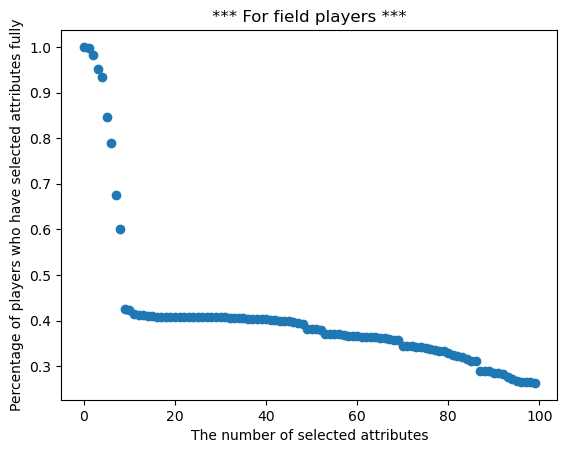

In [109]:
temp = percent_players_has_selected_atts('field')
x_values = list(temp.keys())
y_values = list(temp.values())
plt.scatter(x_values, y_values)
plt.title('*** For field players ***')
plt.xlabel('The number of selected attributes')
plt.ylabel('Percentage of players who have selected attributes fully')
plt.show()

To keep important attributes and players as much as possible, we decided to use top 21 attributes.

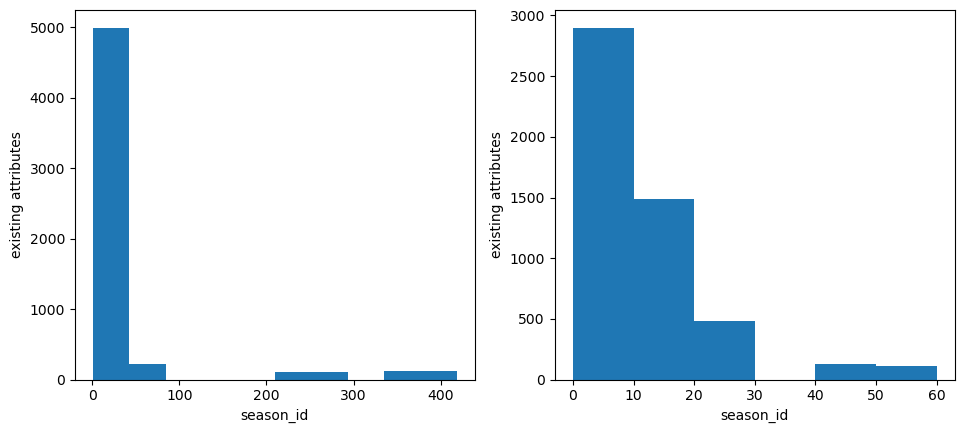

In [110]:
temp = player_dont_have_selec_atts('field')

temp_list = []

for i in temp:
    for k in merged_data[i]['seasons']:
            temp_list.append(int(k))


plt.subplot(121)
plt.hist(temp_list)
plt.xlabel('season_id')
plt.ylabel('existing attributes')

plt.subplot(122)
plt.hist(temp_list, bins = [0, 10, 20, 30, 40, 50, 60])
plt.xlabel('season_id')
plt.ylabel('existing attributes')

plt.subplots_adjust(right=1.5)

plt.show()

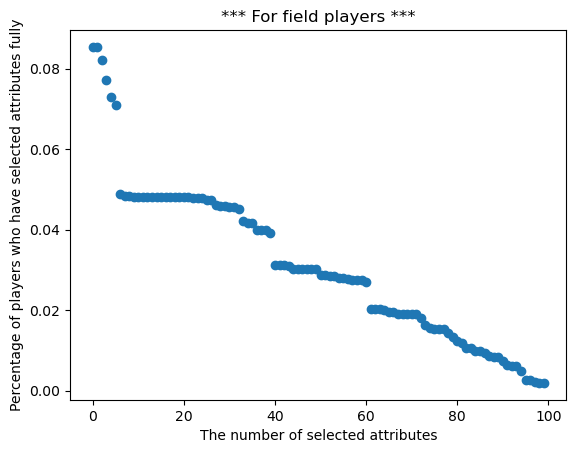

In [111]:
temp = percent_players_has_selected_atts('keeper')
x_values = list(temp.keys())
y_values = list(temp.values())
plt.scatter(x_values, y_values)
plt.title('*** For field players ***')
plt.xlabel('The number of selected attributes')
plt.ylabel('Percentage of players who have selected attributes fully')
plt.show()

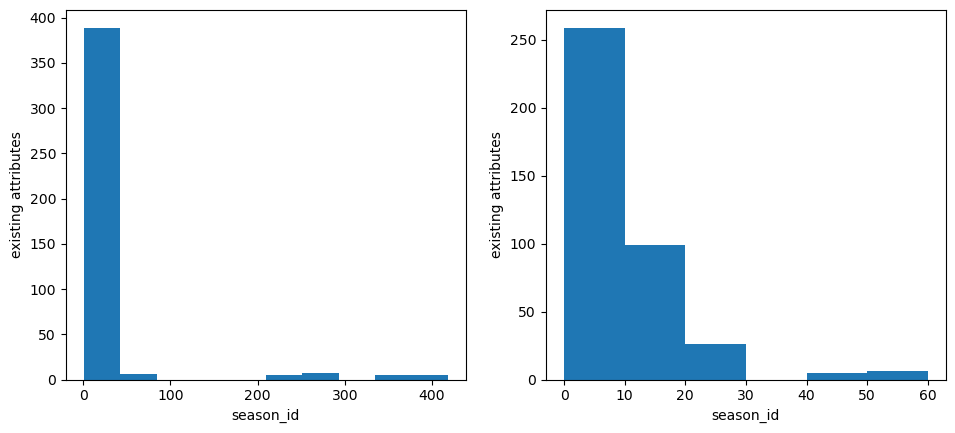

In [112]:
temp = player_dont_have_selec_atts('keeper')

temp_list = []

for i in temp:
    for k in merged_data[i]['seasons']:
            temp_list.append(int(k))


plt.subplot(121)
plt.hist(temp_list)
plt.xlabel('season_id')
plt.ylabel('existing attributes')

plt.subplot(122)
plt.hist(temp_list, bins = [0, 10, 20, 30, 40, 50, 60])
plt.xlabel('season_id')
plt.ylabel('existing attributes')

plt.subplots_adjust(right=1.5)

plt.show()

Goal keepers that do not include 21 selected attributes mainly played during earlier seasons (season_id 0 ~ 20). Therefore, We decide to discard players whose latest season is before 2012-13 (season id:21)